[View in Colaboratory](https://colab.research.google.com/github/getmrinal/ML-Notebook/blob/master/19.%20PCA/LFW_Images.ipynb)

In [0]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble
import time

In [4]:
lfw = datasets.fetch_lfw_people(min_faces_per_person=100,resize =0.4)

/usr/local/lib/python2.7/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python2.7/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


In [6]:
lfw.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [7]:
lfw.data.shape

(1140, 1850)

In [8]:
lfw.images.shape

(1140, 50, 37)

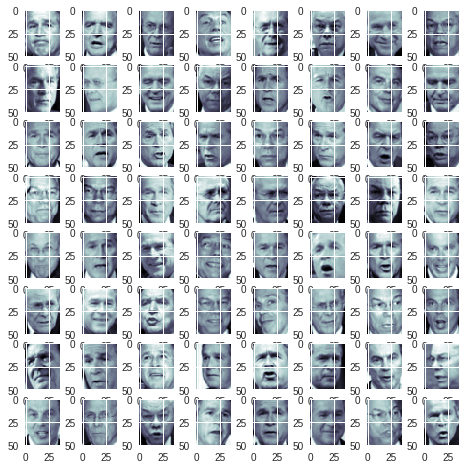

In [10]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
  ax = fig.add_subplot(8,8,i+1)
  ax.imshow(lfw.images[i],cmap=plt.cm.bone)
plt.show()

In [32]:
x = lfw.data
y = lfw.target
x_train,x_test,y_train,y_test = train_test_split(x,y)
pca_oli =  PCA()
pca_oli.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
k = 0
total = 0
while total <0.99:
  total  += pca_oli.explained_variance_ratio_[k]
  k = k + 1
k

318

In [34]:
pca_lfw = PCA(n_components=k,whiten=True)
x_transformed = pca_lfw.fit_transform(x_train)
x_transformed.shape

(855, 318)

In [0]:
x_approx = pca_lfw.inverse_transform(x_transformed)
x_approx = x_approx.reshape((855,50,37))

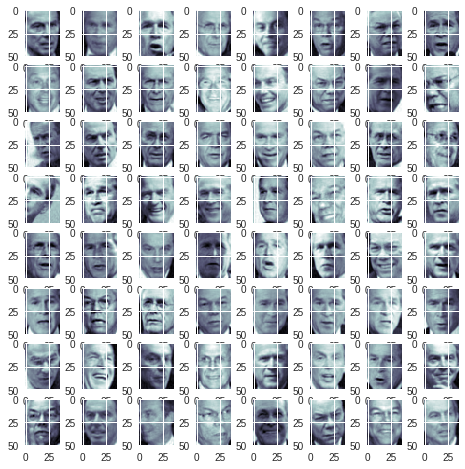

In [36]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
  ax = fig.add_subplot(8,8,i+1)
  ax.imshow(x_approx[i],cmap=plt.cm.bone)
plt.show()

In [0]:
eigenv = pca_lfw.components_.reshape(k,50,37)

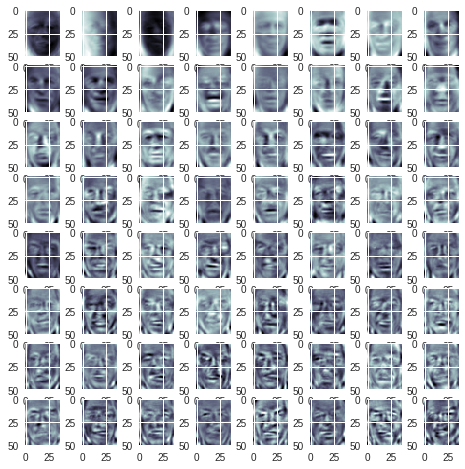

In [38]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
  ax = fig.add_subplot(8,8,i+1)
  ax.imshow(eigenv[i],cmap=plt.cm.bone)
plt.show()

In [0]:
x_train_pca = x_transformed
x_test_pca = pca_lfw.transform(x_test)

In [46]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train,y_train)
print(time.time() - start)
y_pred = rf.predict(x_test)
print(classification_report(y_test,y_pred))

0.230667114258
             precision    recall  f1-score   support

          0       0.57      0.64      0.60        53
          1       0.44      0.26      0.33        31
          2       0.64      0.85      0.73       134
          3       0.23      0.10      0.14        29
          4       0.53      0.24      0.33        38

avg / total       0.55      0.59      0.55       285



In [47]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train_pca,y_train)
print(time.time() - start)
y_pred = rf.predict(x_test_pca)
print(classification_report(y_test,y_pred))

0.129765987396
             precision    recall  f1-score   support

          0       0.41      0.47      0.44        53
          1       0.27      0.10      0.14        31
          2       0.55      0.84      0.66       134
          3       0.50      0.07      0.12        29
          4       0.20      0.03      0.05        38

avg / total       0.44      0.50      0.43       285

